In [174]:
# https://docs.gspread.org/en/latest/api.html#gspread.spreadsheet.Spreadsheet.share

from oauth2client.service_account import ServiceAccountCredentials as sac
import gspread, os

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

# path = './Clouix/Spreadsheets'
jfile = 'ideationology-lab-b60654e44e37.json'
# dir = os.path.join(path, jfile)

creds = sac.from_json_keyfile_name(jfile, scope)
client = gspread.authorize(creds)

url = 'https://docs.google.com/spreadsheets/d/1Va2O06m-sBdjHmxkvl4TpkC-ghm6U8jkFxhShDHDWLE/edit?hl=en&forcehl=1#gid=117935182'
sheet = client.open_by_url(url)

def fetch():
    sheet_instance = sheet.get_worksheet(0)
    records_data = sheet_instance.get_all_records()
    Name=['Date (Y/M/D)']
    for i in records_data:
        Name.append(i['Name'])

    sheet_instance = sheet.get_worksheet(1)
    sheet_instance.update('A1', [Name])
    records_data = sheet_instance.get_all_records()
    return records_data

In [175]:
data = fetch()
data

[{'Date (Y/M/D)': '2022-01-31',
  'Vicky Kumar': 'P',
  'Aditya': 'P',
  'Abhishek verma': 'A',
  'Chirag Pandey': 'P',
  'Ayushi Agarwal ': '',
  'Aakash verma': ''},
 {'Date (Y/M/D)': '2022-02-01',
  'Vicky Kumar': 'P',
  'Aditya': 'A',
  'Abhishek verma': 'A',
  'Chirag Pandey': 'A',
  'Ayushi Agarwal ': 'P',
  'Aakash verma': 'P'},
 {'Date (Y/M/D)': '2022-02-02',
  'Vicky Kumar': 'P',
  'Aditya': 'A',
  'Abhishek verma': 'A',
  'Chirag Pandey': 'A',
  'Ayushi Agarwal ': 'P',
  'Aakash verma': 'P'},
 {'Date (Y/M/D)': '2022-02-03',
  'Vicky Kumar': 'P',
  'Aditya': 'A',
  'Abhishek verma': 'A',
  'Chirag Pandey': 'A',
  'Ayushi Agarwal ': 'A',
  'Aakash verma': 'P'},
 {'Date (Y/M/D)': '2022-02-04',
  'Vicky Kumar': 'P',
  'Aditya': 'A',
  'Abhishek verma': 'A',
  'Chirag Pandey': 'A',
  'Ayushi Agarwal ': 'P',
  'Aakash verma': 'P'},
 {'Date (Y/M/D)': '2022-02-08',
  'Vicky Kumar': 'P',
  'Aditya': 'A',
  'Abhishek verma': 'A',
  'Chirag Pandey': 'A',
  'Ayushi Agarwal ': 'P',
  'Aak

In [176]:
len(data)

7

In [177]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
df.index +=1
df

,Date (Y/M/D),Vicky Kumar,Aditya,Abhishek verma,Chirag Pandey,Ayushi Agarwal,Aakash verma
1,2022-01-31,P,P,A,P,,
2,2022-02-01,P,A,A,A,P,P
3,2022-02-02,P,A,A,A,P,P
4,2022-02-03,P,A,A,A,A,P
5,2022-02-04,P,A,A,A,P,P
6,2022-02-08,P,A,A,A,P,P
7,2022-02-09,P,A,A,A,A,A


In [178]:
df = df.replace('', np.nan)
df

,Date (Y/M/D),Vicky Kumar,Aditya,Abhishek verma,Chirag Pandey,Ayushi Agarwal,Aakash verma
1,2022-01-31,P,P,A,P,NaN,NaN
2,2022-02-01,P,A,A,A,P,P
3,2022-02-02,P,A,A,A,P,P
4,2022-02-03,P,A,A,A,A,P
5,2022-02-04,P,A,A,A,P,P
6,2022-02-08,P,A,A,A,P,P
7,2022-02-09,P,A,A,A,A,A


In [179]:
col = list(df.columns)[1:]
col

['Vicky Kumar',
 'Aditya',
 'Abhishek verma',
 'Chirag Pandey',
 'Ayushi Agarwal ',
 'Aakash verma']

In [180]:
sum(df[col[-1]] == 'P')

5

In [181]:
import pandas as pd
import numpy as np

data = fetch()
df = pd.DataFrame(data)
df.index +=1

dc = {}
col = list(df.columns)[1:]

for i in range(len(col)):
    dc.update({col[i] : sum(df[col[i]] == 'P')})
dc

{'Vicky Kumar': 7,
 'Aditya': 1,
 'Abhishek verma': 0,
 'Chirag Pandey': 1,
 'Ayushi Agarwal ': 4,
 'Aakash verma': 5}

In [182]:
def plot_it():
    import pandas as pd
    import numpy as np

    data = fetch()
    df = pd.DataFrame(data)
    df.index +=1

    dc = {}
    col = list(df.columns)[1:]

    for i in range(len(col)):
        dc.update({col[i] : sum(df[col[i]] == 'P')})
    
    import matplotlib.pyplot as plt
    import io, base64

    img = io.BytesIO()
    y = list(dc.values())
#     x = list(dc.keys())
    x = []
    for i in range(len(col)):
        a = chr(65+i)
        x.append(a)

    fig = plt.figure(figsize = (5, 5))
    plt.bar(x, y, color ='red', width = 0.4)
    plt.grid(True)
#     plt.xticks(rotation=90)

    plt.ylabel("No. of Attendance  --->")
    plt.title("Attendance Frequency : Bar Graph\n")

    plt.savefig(img, format='png')
    img.seek(0)
    return base64.b64encode(img.getvalue()).decode()

'iVBORw0KGgoAAAANSUhEUgAAAWgAAAFoCAYAAAB65WHVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3deVhU9eI/8PfApKLsyiKCIK6oKTmWimJWuFw1eygz962rmdmllL7lYzc1e3JDc8lbjgpuCKmJ+1YK5poXDE1NbRFjRANUhJF9+Pz+6Do/EWTzTOdD8349zzyPM+ecz+c9p/Hd8cyZGY0QQoCIiKRjo3YAIiIqHwuaiEhSLGgiIkmxoImIJMWCJiKSFAuaiEhSLGgiIkmxoImIJMWCJiKSFAuaiEhSLGgiIkmxoP+GUlJSoNFoUFxcrHYUIiQkJMDb21vtGLUSC1pBvXr1gouLCwoKCko97ufnh2+//dZ83xoL1M/PD3Z2drC3tzff0tLS1I4llYSEBNjY2Jj3T5MmTTBz5kzF50lMTMTAgQPh4uICZ2dntG3bFjNmzMCdO3cUn4seDwtaISkpKTh69Cg0Gg127typdhwp7dq1C0aj0Xzz8vIqtdya/of1KF5eXub9c+zYMaxZswbbt2+v0Vjl7c8TJ06gV69e6N69Oy5duoSsrCzs378fWq0WZ8+erfI49NdgQStk/fr16Nq1K8aOHYt169aZHx81ahR+//13vPjii7C3t8eCBQvQs2dPAICzszPs7e1x8uRJAEBkZCQCAgLg4uKCvn374tq1a+ZxNBoNvvzyS7Rs2RIuLi546623cP+bYk0mE8LDw9GoUSP4+/tjz549pbJFRUUhICAADg4O8Pf3x8qVK83L7v/zc9GiRXB3d0fjxo0RFRVlXp6Xl4dp06bB19cXTk5O6NGjB/Ly8gAAp06dQlBQEJydndGxY0ckJCRUe79pNBqsWLECLVu2RMuWLQE

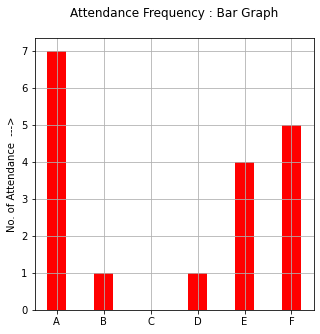

In [183]:
plot_it()

In [184]:
x = []
for i in range(len(col)):
    a = chr(65+i)
#     print(a)
    x.append(a)

# ord('A'), chr(65)
x

['A', 'B', 'C', 'D', 'E', 'F']

In [138]:
def plot_url(data):
    import matplotlib.pyplot as plt
    import io, base64

    def countFreq(arr, n):
        mp = dict()
        for i in range(n):
            if arr[i] in mp.keys():
                mp[arr[i]] += 1
            else:
                mp[arr[i]] = 1
        return mp

    arr = list(data.values())
    n = len(arr)
    mp = countFreq(arr, n)
    print('\n************---> ', mp)

    img = io.BytesIO()
    y = list(mp.values())
    x = list(mp.keys())

    fig = plt.figure(figsize = (5, 5))
    plt.bar(x, y, color ='red', width = 0.4)

    plt.xlim(0,5)
    plt.grid(True)

    plt.xlabel("Options  --->")
    plt.ylabel("No. of Votes  --->")
    plt.title("Favourite ice Cream Flavour : Poll Result\n")

    plt.savefig(img, format='png')
    img.seek(0)
    return base64.b64encode(img.getvalue()).decode()


************--->  {1: 2, 3: 2, 4: 4, 2: 1}


'iVBORw0KGgoAAAANSUhEUgAAAWgAAAFoCAYAAAB65WHVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nO3deVQUZ7oG8KeV0YDNoiiKNkIMoohAKy4kUcQYUJHglhiXuBsHFZd4zSTnmlxH4+AyEJcJ0dt3DO6QjGeMG2hipHWiIOOCd8SouIDSoEK0BdzA5rt/eK0RQWwMZVfD8zuHc+yqt796v+7msajuqlYJIQSIiEhxGli6ASIiqhoDmohIoRjQREQKxYAmIlIoBjQRkUIxoImIFIoBTUSkUAxoIiKFYkATESkUA5qISKEY0ERECsWAVriBAwdiw4YNtTLWli1bEBoaWitj1UUeHh7Yv3+/pduwCL1eD41GI91W2mPxxz/+ER988IGl23jp6n1Ae3h4wNbWFmq1WvrJy8uzdFuS5ORkjB8/HgCwfv169OrV64XHGjNmDH744Yfaak1SVFSEOXPmoG3btlCr1fD09MScOXNQWFhY69v6rSZMmIBGjRpVeL6//fZbS7dVa/R6PRo0aAC1Wg17e3t06NAB8fHxtbqNJx/DZs2aISQkBGfPnq3VbVQnOzsbKpUKDx8+fGnbtJR6H9AAsGvXLpSUlEg/rVu3tnRLEEKgvLzc0m08V2lpKfr164fMzEzs3bsXRUVFOHLkCJydnZGenl6pXgm/VH/4wx8qPN/vv/++pVuq0os+Vq1bt0ZJSQmKioqwbNkyfPjhhzhz5kyt9vb4MTQYDGjTpg0mT55cq+PTIwzoKty6dQvh4eFo0aIFmjZtivDwcOTm5gIAEhMT0a1btwr1K1asQEREBADg9u3bGDduHFq0aAF3d3csXrxYCtqn/0x7ek8gODgY8+fPx5tvvgk7OztcunQ

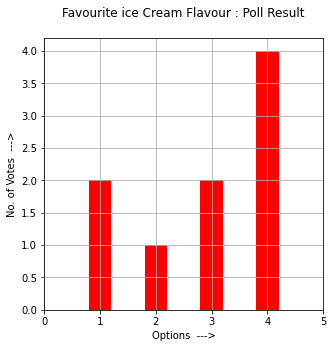

In [139]:
data = {'aman': 1, 'ankit': 3, 'ankitmalpani1975': 4, 'harsh': 4, 'harshit': 2, 'hellovickykumar123': 4, 'imvickykumar999': 1, 'imvix': 3, 'sameer': 4}
plot_url(data)